In [3]:
# Import Librabries
import numpy as np
import pandas as pd
import keras
#pip install keras==2.8.0
!pip install opencv-python-headless

import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.9 MB ? eta -:--:--
    --------------------------------------- 0.5/38.9 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.3/38.9 MB 2.2 MB/s eta 0:00:17
   - -------------------------------------- 1.8/38.9 MB 2.2 MB/s eta 0:00:17
   -- ------------------------------------- 2.1/38.9 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.4/38.9 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/38.9 MB 1.7 MB/s eta 0:00:21
   -- ------------------------------------- 2.9/38.9 MB 1.7 MB/s eta 0:00:22
   --- ------------------------------------ 3.1/38.9 MB 1.7 MB/s eta 0:00:22
   --- ------------------------------------ 3.4/38.9 MB 1.7 MB/s eta 0:00:21
   --- ------------------------------------ 3.7/38.9 MB 1.6 MB/s eta 0:00:22
   ---- ------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [12]:
df = pd.read_csv("train.csv")
base_path ="./images/"

In [13]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [16]:
df = df.loc[df["id"].str.startswith(('00', '7d', 'b1'), na=False), :]
num_classes = len(df ["landmark_id"].unique())
num_data = len(df)

In [18]:
num_classes

33307

In [20]:
num_data

48467

In [22]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data

,count
landmark_id,
138982,135
62798,46
176528,43
177870,35
126637,31
...,...
174504,1
11349,1
95128,1


In [24]:
data.reset_index(inplace=True)
data.columns=["landmark_id", "count"]
data

,landmark_id,count
0,138982,135
1,62798,46
2,176528,43
3,177870,35
4,126637,31
...,...,...
33302,174504,1
33303,11349,1
33304,95128,1
33305,168282,1


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4935e+04, 0.0000e+00,
        0.0000e+00, 5.3970e+03, 0.0000e+00, 0.0000e+00, 1.6300e+03,
        0.0000e+00, 0.0000e+00, 6.2700e+02, 0.0000e+00, 0.0000e+00,
        2.9000e+02, 0.0000e+00, 0.0000e+00, 1.4700e+02, 0.0000e+00,
        0.0000e+00, 8.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.5000e+01, 0.0000e+00, 0.0000e+00, 3.6000e+01, 0.0000e+00,
        0.0000e+00, 2.8000e+01, 0.0000e+00, 0.0000e+00, 1.6000e+01,
        0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

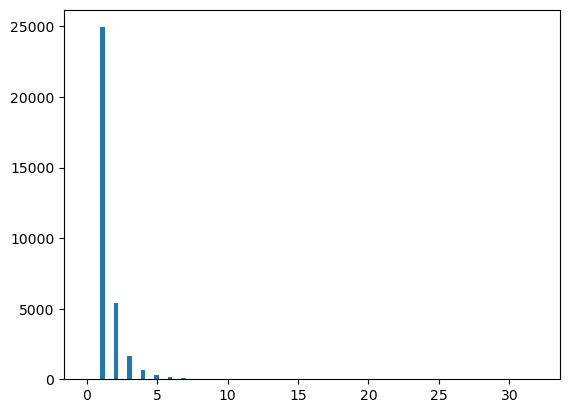

In [26]:
plt.hist(data['count'], 100, range= (0,32), label = 'test')

In [28]:
data['count'].between (0,5).sum()

32879

In [30]:
data['count'].between (5,10).sum()

638

(array([1., 1., 1., ..., 1., 1., 2.]),
 array([0.00000e+00, 1.10000e+01, 2.20000e+01, ..., 2.03075e+05,
        2.03084e+05, 2.03085e+05]),
 <BarContainer object of 33306 artists>)

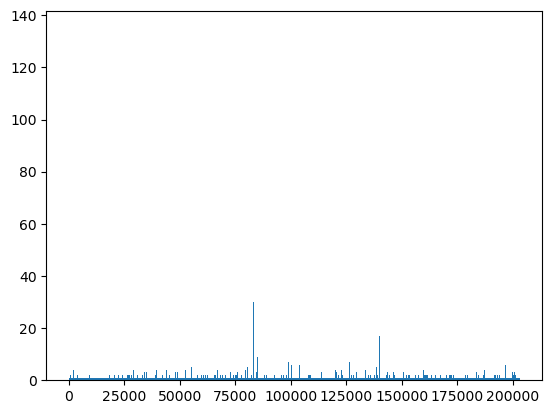

In [38]:
plt.hist(df["landmark_id"], bins=np.sort(df["landmark_id"].unique()))

<Axes: xlabel='landmark_id'>

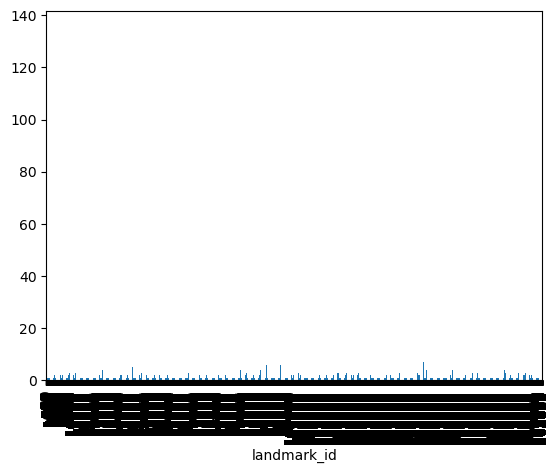

In [40]:
df["landmark_id"].value_counts().sort_index().plot(kind='bar')


In [42]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df ["landmark_id"])

LabelEncoder()

In [46]:
def encode_label(label):
    return lencoder.transform(label)

In [50]:
def decode_label(label):
    return lencoder.inverse_transform(label)

In [125]:
def get_image_from_numbers (num, df):
    fname, label = df.iloc[num,:]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path= os.path.join(base_path, f1, f2, f3, fname)
    im = cv2.imread(full_path)
    return im, label

4 sample Images from random classes


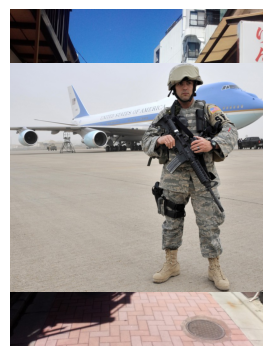

In [117]:
print("4 sample Images from random classes")
fig = plt.figure(figsize=(15,15))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + random.choice(["0/0/", "0/7/", "0/9/"]) + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder + "/" + random_img))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [70]:
#building model
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [72]:
# Hyper parameter
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.9
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout (0.5)

In [76]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense (num_classes, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 276,029,031 (1.03 GB)

 Trainable params: 276,029,025 (1.03 GB)

 Non-trainable params: 6 (24.00 B)

In [80]:
optimi = keras.optimizer_v1.RMSprop(lr= learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics= ["accuracy"])

AttributeError: module 'keras' has no attribute 'optimizer_v1'

In [82]:
from keras.optimizers import RMSprop

optimi = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimi, loss=loss_function, metrics=["accuracy"])


In [84]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [127]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    end_img =start+batch_size
    if(end_img) > len(dataframe):
        end_img =len(dataframe)
    for idx in range(start, end_img):
        n = idx
        im, label =get_image_from_numbers(n, dataframe)
        im =image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    label_array = encode_label(label_array)
    return np.array(image_array), np.array (label_array)

In [90]:
# split
train, val = np.split(df.sample(frac=1), [int(0.8*len(df))])
print(len(train))
print(len(val))

38773
9694


C:\Users\adi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.


In [92]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

In [139]:
for e in range(epochs):
    print("Epoch :" + str (e+1) + "/"+ str(epochs))
    if epoch_shuffle:
        train= train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        model.train_on_batch(X_train, y_train)
model.save("Model")

Epoch :1/1


ValueError: too many values to unpack (expected 2)

Index(['id', 'url', 'landmark_id'], dtype='object')


In [131]:
#Test
batch_size = 16
errors= 0
good_preds = []
bad_preds = []
for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch (val, it*batch_size, batch_size)
    result =model.predict(X_val)
    cla= np.argmax(result, axis=1)
    for idx, res in enumerate (result):
        if cla[idx] != y_val [idx]:
            errors= errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla [idx]]])
    else:
        good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

ValueError: too many values to unpack (expected 2)

In [133]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key =lambda x: x[2], reverse=True))

In [135]:
len(good_preds)

0

In [149]:
fig=plt.figure(figsize=(16,16))
for i in range(7, 12):
    n = int(good_preds[1,0])
    img, lbl = get_image_from_numbers(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, 1-6)
    plt.imshow(img)
    lb12 = np.array(int(good_preds [i, 1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lb1)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class" + str(lbl) + ": " + str(lbl2) )
    plt.axis('off')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1600x1600 with 0 Axes>